In [11]:
from collections import Counter, defaultdict
import json

char_n = 4
def _normalize( line:str):
    return line.replace('"', "'").replace("/", " ")

In [12]:
def _char_ngrams( line):
    ngrams = Counter()
    
    line = f" {line.strip()} "
    cur_ngrams = [line[i:i+char_n].strip() for i in range(0, len(line)-char_n)]
    return [subtok for subtok in cur_ngrams if len(subtok) > 1]

### Hindi ngram

In [32]:
with open('../corpus/hindi_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/hindi_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Bhojpuri ngram

In [33]:
with open('../corpus/bhojpuri_sentence_list.json','r') as f:
    total_sentences = json.load(f)

line = 'hello how are you doing today'
total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/bhojpuri_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Angika ngram

In [34]:
with open('../corpus/angika_sentence_list.json','r') as f:
    total_sentences = json.load(f)

line = 'hello how are you doing today'
total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/angika_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Konkani ngram

In [35]:
with open('../corpus/konkani_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/konkani_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Maithali ngram

In [36]:
with open('../corpus/maithali_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/maithali_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Marathi ngram

In [37]:
with open('../corpus/marathi_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/marathi_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Nepal Bhasha

In [38]:
with open('../corpus/nepal_bhasha_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/nepal_bhasha_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Nepali ngram

In [39]:
with open('../corpus/nepali_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/nepali_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Sanskrit ngram

In [40]:
with open('../corpus/sanskrit_sentence_list.json','r') as f:
    total_sentences = json.load(f)

total_ngram = []
for i,setence in enumerate(total_sentences):
    setence = _normalize(setence) 
    total_ngram.extend(list(set(_char_ngrams(setence))))
with open('../corpus/sanskrit_ngram.json','w') as f:
    json.dump(list(set(total_ngram)),f)

### Ngram Model

In [13]:
lang_map = {
    'hindi': '../corpus/hindi_ngram.json',
    'sanskrit': '../corpus/sanskrit_ngram.json',
    'konkani': '../corpus/konkani_ngram.json',
    'bhojpuri': '../corpus/bhojpuri_ngram.json',
    'angika': '../corpus/angika_ngram.json',
    'marathi': '../corpus/marathi_ngram.json',
    'maithali': '../corpus/maithali_ngram.json',
    'nepali': '../corpus/nepali_ngram.json',
    'nepal_bhasha': '../corpus/nepal_bhasha_ngram.json',
    
}

In [14]:
_lexicon = []
for lang, loc in lang_map.items():
    with open(loc,'r') as f:
        ngram_data = json.load(f)
    
    _lexicon.append((lang,ngram_data))

In [15]:
lex_dict = defaultdict(list)
for i, (lang, toks) in enumerate(_lexicon):
      
    for tok in toks:
        lex_dict[tok].append(lang)

    # converting list to tuple gives a 27% space improvement
for tok, langs in lex_dict.items():
    lex_dict[tok] = tuple(langs)
del _lexicon


In [46]:
def predict(text, top_n_predictions=5):
    normalized =  _normalize(text)
    tok_text = _char_ngrams(normalized)
    if not tok_text: return [("und", 0)][0][0]
    try:
        possible_langs = [lang for tok in tok_text for lang in  lex_dict[tok] ]

        return  [(lang, ct/len(tok_text)) for  lang, ct in Counter(possible_langs).most_common(top_n_predictions)][0][0]
    except:
        print(text)
        possible_langs = [lang for tok in tok_text for lang in  lex_dict[tok] ]
        print(possible_langs)
        return None

In [37]:
predict('नमस्ते, आप कैसे हैं',1)

'hindi'

In [17]:
import os
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# import argparse




In [19]:
df = pd.read_csv('../corpus/dataset.csv')
df['sentence']=df['sentence'].values.astype('U')
print(len(df))

X = df['sentence']
y = df['lang']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)
df_test = pd.concat([X_test, y_test], axis=1)
df_2 = pd.concat([X_train, y_train], axis=1)


773034


In [20]:
del df

In [65]:
y_pred = []
for i, t in enumerate(X_test):
    print(i)
    y_pred.append(predict(t,1))
    

0
1
2
3
4
5
6


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
nan
[]
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
nan
[]
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [66]:
label_class = {
    'hindi': 2,
    'konkani': 3,
    'marathi':5,
    'maithali':4,
    'bhojpuri':1,
    'sanskrit':8,
    'nepali':7,
    'nepal_bhasha':6,
    'angika':0
}

In [67]:
y_pred_new = []
for p in y_pred:
    print(p)
    if p not in label_class.keys():
        y_pred_new.append(10)
    else:
        y_pred_new.append(label_class[p])

hindi
sanskrit
nepali
nepali
nepali
nepal_bhasha
hindi
marathi
nepali
hindi
konkani
hindi
angika
konkani
nepal_bhasha
konkani
nepali
sanskrit
hindi
hindi
konkani
None
konkani
hindi
marathi
konkani
konkani
nepal_bhasha
sanskrit
sanskrit
maithali
hindi
nepali
konkani
nepal_bhasha
bhojpuri
hindi
konkani
konkani
hindi
maithali
marathi
hindi
marathi
sanskrit
maithali
marathi
nepal_bhasha
marathi
hindi
marathi
konkani
maithali
konkani
hindi
hindi
bhojpuri
nepal_bhasha
bhojpuri
hindi
hindi
bhojpuri
hindi
sanskrit
hindi
sanskrit
sanskrit
nepal_bhasha
konkani
marathi
sanskrit
sanskrit
sanskrit
marathi
nepal_bhasha
sanskrit
bhojpuri
sanskrit
marathi
sanskrit
maithali
hindi
und
konkani
hindi
maithali
und
marathi
nepal_bhasha
konkani
sanskrit
nepal_bhasha
nepali
sanskrit
bhojpuri
sanskrit
marathi
sanskrit
nepal_bhasha
marathi
nepali
marathi
nepali
marathi
marathi
sanskrit
maithali
marathi
konkani
hindi
nepali
marathi
bhojpuri
hindi
bhojpuri
konkani
hindi
maithali
sanskrit
konkani
bhojpuri
hindi
hi

In [68]:
y_test_new = []
for p in y_test:
    print(p)
    if p not in label_class.keys():
        y_test_new.append(10)
    else:
        y_test_new.append(label_class[p])

nepal_bhasha
sanskrit
nepali
nepali
nepali
nepal_bhasha
hindi
marathi
nepali
nepali
konkani
angika
angika
konkani
nepal_bhasha
konkani
nepali
sanskrit
hindi
nepali
konkani
hindi
konkani
angika
marathi
konkani
marathi
nepal_bhasha
sanskrit
konkani
nepal_bhasha
nepal_bhasha
nepali
konkani
nepal_bhasha
maithali
hindi
konkani
konkani
hindi
maithali
marathi
hindi
marathi
sanskrit
maithali
marathi
nepal_bhasha
marathi
hindi
marathi
konkani
maithali
bhojpuri
hindi
angika
bhojpuri
nepal_bhasha
bhojpuri
hindi
maithali
bhojpuri
angika
sanskrit
marathi
sanskrit
sanskrit
nepal_bhasha
konkani
marathi
maithali
sanskrit
sanskrit
marathi
nepal_bhasha
sanskrit
bhojpuri
sanskrit
marathi
sanskrit
maithali
hindi
maithali
konkani
hindi
maithali
marathi
marathi
nepal_bhasha
konkani
sanskrit
nepal_bhasha
nepali
sanskrit
bhojpuri
sanskrit
marathi
konkani
nepal_bhasha
marathi
nepali
marathi
nepali
marathi
marathi
sanskrit
maithali
nepal_bhasha
konkani
hindi
nepali
marathi
bhojpuri
hindi
bhojpuri
konkani
hindi


In [53]:
y_pred_new

[0,
 5,
 6,
 6,
 6,
 7,
 0,
 2,
 6,
 0,
 1,
 0,
 8,
 1,
 7,
 1,
 6,
 5,
 0,
 0,
 1,
 10,
 1,
 0,
 2,
 1,
 1,
 7,
 5,
 5,
 3,
 0,
 6,
 1,
 7,
 4,
 0,
 1,
 1,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 2,
 7,
 2,
 0,
 2,
 1,
 3,
 1,
 0,
 0,
 4,
 7,
 4,
 0,
 0,
 4,
 0,
 5,
 0,
 5,
 5,
 7,
 1,
 2,
 5,
 5,
 5,
 2,
 7,
 5,
 4,
 5,
 2,
 5,
 3,
 0,
 10,
 1,
 0,
 3,
 10,
 2,
 7,
 1,
 5,
 7,
 6,
 5,
 4,
 5,
 2,
 5,
 7,
 2,
 6,
 2,
 6,
 2,
 2,
 5,
 3,
 2,
 1,
 0,
 6,
 2,
 4,
 0,
 4,
 1,
 0,
 3,
 5,
 1,
 4,
 0,
 0,
 6,
 0,
 0,
 5,
 3,
 7,
 6,
 6,
 0,
 3,
 3,
 7,
 2,
 4,
 2,
 0,
 5,
 3,
 1,
 3,
 3,
 5,
 2,
 1,
 4,
 2,
 5,
 8,
 2,
 2,
 7,
 7,
 5,
 6,
 8,
 2,
 1,
 3,
 7,
 5,
 6,
 5,
 2,
 1,
 0,
 10,
 0,
 5,
 2,
 1,
 5,
 0,
 0,
 1,
 1,
 0,
 6,
 8,
 7,
 0,
 2,
 6,
 10,
 4,
 6,
 6,
 7,
 2,
 0,
 1,
 5,
 0,
 10,
 0,
 5,
 1,
 1,
 4,
 1,
 0,
 1,
 0,
 5,
 6,
 0,
 5,
 3,
 0,
 0,
 10,
 7,
 3,
 7,
 0,
 2,
 3,
 1,
 0,
 7,
 6,
 3,
 3,
 0,
 0,
 2,
 2,
 4,
 0,
 7,
 1,
 6,
 0,
 2,
 0,
 4,
 1,
 1,
 2,
 2,
 0,
 7,
 1,
 4,
 3,
 7,
 

In [57]:
label_class.keys()

dict_keys(['hindi', 'konkani', 'marathi', 'maithali', 'bhojpuri', 'sanskrit', 'nepali', 'nepal_bhasha', 'angika'])

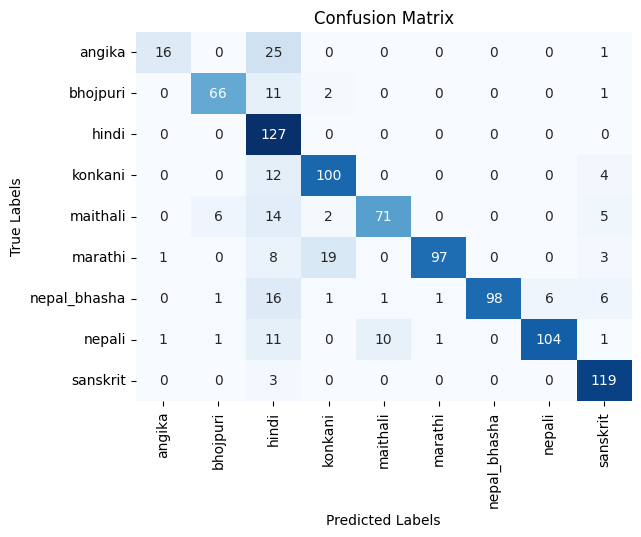

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
class_labels = ['angika', 'bhojpuri', 'hindi', 'konkani', 'maithali', 'marathi', 'nepal_bhasha', 'nepali', 'sanskrit']

cm = confusion_matrix(y_test_new, y_pred_new,labels=np.arange(len(class_labels)))
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f'Accuracy: {accuracy:.4f}')

# Precision, Recall, F1-Score
precision = precision_score(y_test_new, y_pred_new, average='weighted')
recall = recall_score(y_test_new, y_pred_new, average='weighted')
f1 = f1_score(y_test_new, y_pred_new, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

# Classification Report
print('******')
print(classification_report(y_test_new, y_pred_new))


Accuracy: 0.7980
Precision: 0.8621, Recall: 0.7980, F1-Score: 0.8120
******
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        42
           1       0.89      0.81      0.85        81
           2       0.56      0.98      0.71       129
           3       0.81      0.78      0.79       129
           4       0.87      0.70      0.77       102
           5       0.98      0.75      0.85       129
           6       1.00      0.75      0.86       130
           7       0.95      0.81      0.87       129
           8       0.85      0.92      0.88       129
          10       0.00      0.00      0.00         0

    accuracy                           0.80      1000
   macro avg       0.78      0.69      0.71      1000
weighted avg       0.86      0.80      0.81      1000



/Users/kishan/Desktop/ms/ling/project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kishan/Desktop/ms/ling/project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kishan/Desktop/ms/ling/project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/k

In [76]:
from sklearn.metrics import precision_recall_fscore_support

# Class-wise metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test_new, y_pred_new, average=None)
class_labels = [f'Class {i}' for i in range(len(precision))]

# Create a DataFrame or plot directly
class_metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': f1}, index=class_labels)
print(class_metrics_df)


         Precision    Recall  F1-Score
Class 0   0.888889  0.380952  0.533333
Class 1   0.891892  0.814815  0.851613
Class 2   0.559471  0.984496  0.713483
Class 3   0.806452  0.775194  0.790514
Class 4   0.865854  0.696078  0.771739
Class 5   0.979798  0.751938  0.850877
Class 6   1.000000  0.753846  0.859649
Class 7   0.945455  0.806202  0.870293
Class 8   0.850000  0.922481  0.884758
Class 9   0.000000  0.000000  0.000000


/Users/kishan/Desktop/ms/ling/project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
